## Ejercicios Numpy vectores

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy


In [3]:
dec1 = np.linspace(0,0.5,6)
cen1 = np.linspace(0.51,0.59,9)
dec2 = np.linspace(0.6,1,5)
np.hstack([dec1,cen1,dec2])


array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

In [3]:
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

arr = y[0:]+np.hstack([y[1:],0])+np.hstack([y[2:],0,0])
ys = np.hstack([y[0],arr[:-2]/3,y[-1]])
np.shape(ys)

print(ys.shape)
print(y)
print(ys)


(10000,)
[ 0.59307089  0.39726244 -0.01486179 ...  0.0085475  -0.38193087
  0.11087398]
[ 0.59307089  0.32515718  0.24619066 ... -0.44486307 -0.08750313
  0.11087398]


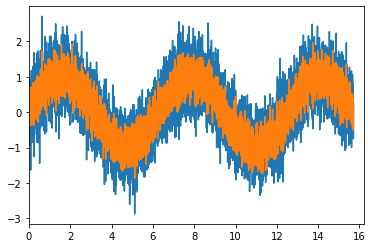

In [116]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [22]:
pxi = np.array([0.25,0.75])
def calcular_entropia(pxi):
    return pxi*np.log2(pxi)*-1
calcular_entropia(pxi)

array([0.5       , 0.31127812])

In [132]:
x = np.array([-5.3,-1,0,1.5,10,100])

**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [6]:
def g(x): #<- vector
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia # <- vector del mismo tamaño que x
    
gastos = np.array([100,50,25,100]) #vector
ganancia = g(gastos)

print("Ganancias",ganancia)

def c(x):
    cx = (np.power(x,2) + x + np.log(0.0001*x) - np.sqrt(0.54*x))/100
    return cx

def ganancia_neta(x,g,c):
    return g(x) - c(x)
ganancia_neta(gastos,g,c)
    

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


array([20298.85689469,  2574.42504495,   330.9752857 , 20298.85689469])

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [20]:
x = np.array([1,2,3,4,5,6,7,8,9,2,2])
def mode(x):
    clasi = np.unique(x, return_counts = True) #mira cuantos son únicos en el arreglo
    conteo = np.max(clasi[1])
    mode = clasi[0][np.argmax(clasi[1])]
    
    return (mode,conteo)
    
print(mode(x))
    

(2, 3)


**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [25]:
def entropia_total(pxi):
    return -np.sum(calcular_entropia(pxi))
entropia_total([0.25,0.75])

-0.8112781244591328

**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [26]:
def cross_entropy(Y,Y_hat):
    return -np.inner(Y, np.log(Y_hat))
    
    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

0.35667494393873245

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [31]:
def magnitud(x):
    return np.sum(np.power(x,2)) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

if magnitud(errores_modelo1) > magnitud(errores_modelo2):
    print(magnitud(errores_modelo2))
else:
    print(magnitud(errores_modelo1))

# elegir el mejor modelo con una condicional(if)

10
6
6


In [32]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    return x / magnitud(x)
    

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

0.10000000000000002
[0.         0.16666667 0.16666667 0.33333333]


**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [33]:
# Aplicar la red neuronal sobre los siguientes datos X
def neural_network(Input_Layer):
    HL1 = np.array([0.25,0.37])
    HL2 = np.array([-8,14])
    Output_Layer = np.array([4,9])
    HL1s = np.inner(Input_Layer,HL1)
    HL2s = np.inner(Input_Layer,HL2)
    HLsalida = np.array([HL1s, HL2s])
    salida = np.inner(HLresult,Output_Layer )
    print("Neurona buscada: ", np.argmax(HLsalida)+1)
    return salida


X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

print(neural_network(X1))
print(neural_network(X2))
print(neural_network(X3))
print(neural_network(X4))
print(neural_network(X5))

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
x4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

NameError: name 'HLresult' is not defined